# Vehicle Pricing Prediction

Objective Build a system that can predict the prices for vehicles using data on Vehicle specifications, make, etc. Explore the data to understand the features and figure out an approach.

In [ ]:
#Importing basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the data
df =pd.read_csv("/content/drive/MyDrive/Unified Mentor Projects/Data files/Vehicle Pricing.csv")


In [ ]:
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [ ]:
df.shape

(1002, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1002.0,2023.916168,0.298109,2023.0,2024.0,2024.0,2024.0,2025.0
price,979.0,50202.985700,18700.392062,0.0,36600.0,47165.0,58919.5,195895.0
cylinders,897.0,4.975474,1.392526,0.0,4.0,4.0,6.0,8.0
mileage,968.0,69.033058,507.435745,0.0,4.0,8.0,13.0,9711.0
doors,995.0,3.943719,0.274409,2.0,4.0,4.0,4.0,5.0


In [ ]:
df.isnull().sum()

,0
name,0
description,56
make,0
model,0
year,0
price,23
engine,2
cylinders,105
fuel,7
mileage,34


In [ ]:
df['price'].isnull().sum()

np.int64(23)

In [ ]:
# Drop rows where price is missing or zero
df = df[df['price'].notnull()]


In [ ]:
df.shape

(979, 17)

In [ ]:
 # Show rows where price is zero
zero_price_rows = df[df['price'] == 0]


In [ ]:
zero_price_rows

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
94,2024 Audi SQ5 Premium Plus,\n \n Ultra Blue Metallic 2024 Aud...,Audi,SQ5,2024,0.0,oled Turbo Premium Unleaded V-6 3.0 L/183,6.0,Gasoline,14.0,Automatic,Premium Plus,SUV,4.0,Ultra Blue Metallic,Black,All-wheel Drive


In [ ]:
df = df[df['price'] > 0]

In [ ]:
df.shape

(978, 17)

In [ ]:
# Drop columns not useful for prediction
df.drop(columns=['name', 'description'], inplace=True)


In [ ]:
df.shape

(978, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 0 to 1001
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   make            978 non-null    object 
 1   model           978 non-null    object 
 2   year            978 non-null    int64  
 3   price           978 non-null    float64
 4   engine          976 non-null    object 
 5   cylinders       876 non-null    float64
 6   fuel            971 non-null    object 
 7   mileage         944 non-null    float64
 8   transmission    976 non-null    object 
 9   trim            977 non-null    object 
 10  body            975 non-null    object 
 11  doors           971 non-null    float64
 12  exterior_color  973 non-null    object 
 13  interior_color  941 non-null    object 
 14  drivetrain      978 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 122.2+ KB


In [ ]:
df.dtypes

,0
make,object
model,object
year,int64
price,float64
engine,object
cylinders,float64
fuel,object
mileage,float64
transmission,object
trim,object


In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
# Categorical features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

**Counting the cars based on transmission type**

/tmp/ipython-input-133-2362016852.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['transmission'], palette = 'Paired')


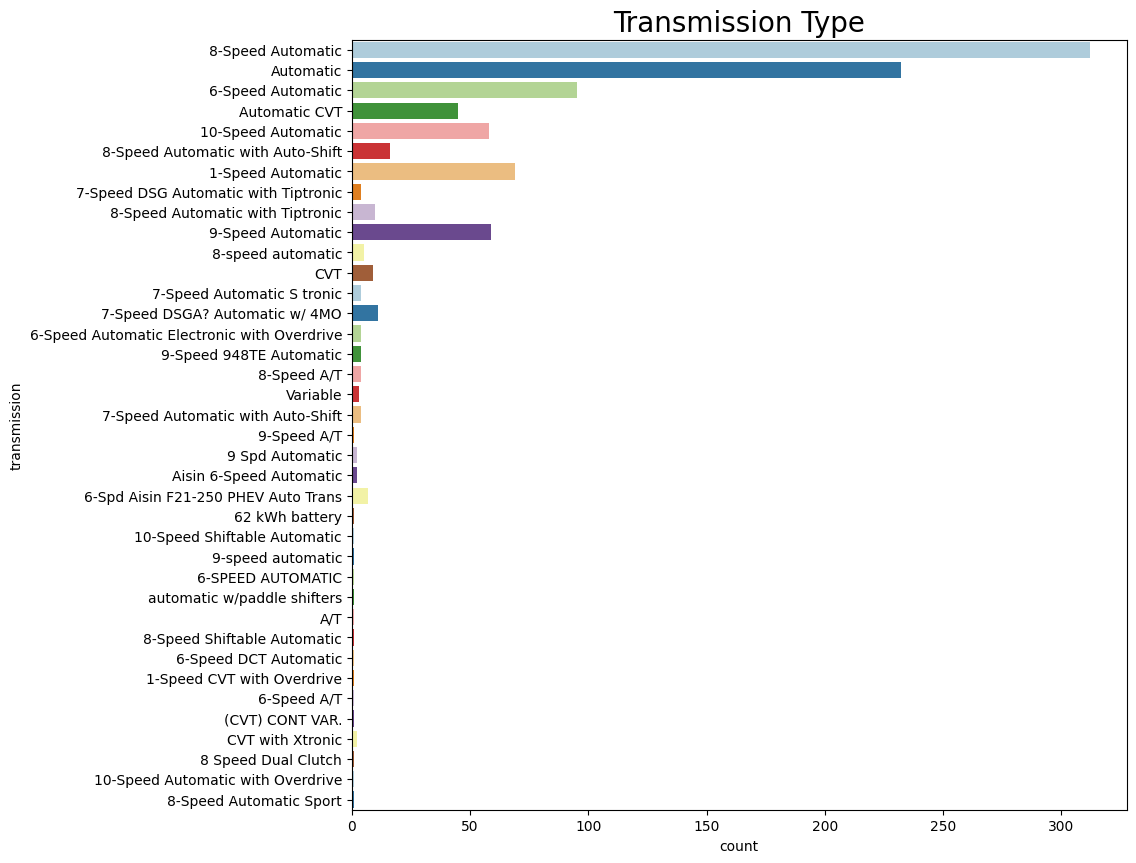

In [ ]:

plt.figure(figsize = (10, 10))
sns.countplot(df['transmission'], palette = 'Paired')
plt.title("Transmission Type", fontsize = 20)
plt.show()

**Countplot of the total cars per different years**

/tmp/ipython-input-139-444043408.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df.sort_values('year'), palette='viridis')


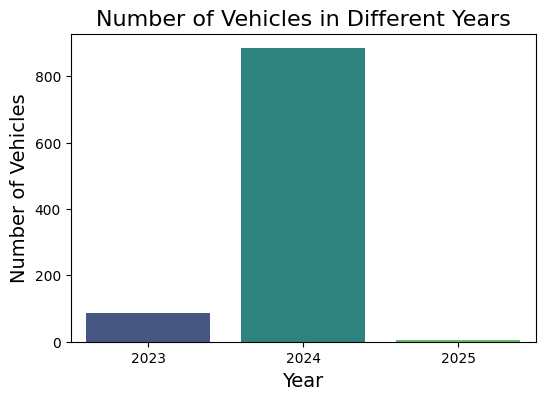

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='year', data=df.sort_values('year'), palette='viridis')

plt.title("Number of Vehicles in Different Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Vehicles", fontsize=14)
#plt.xticks(rotation=45, ha='right')
plt.show()

**Countplot of different Vehicle companies**

/tmp/ipython-input-141-3994245089.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df.make,palette='husl')


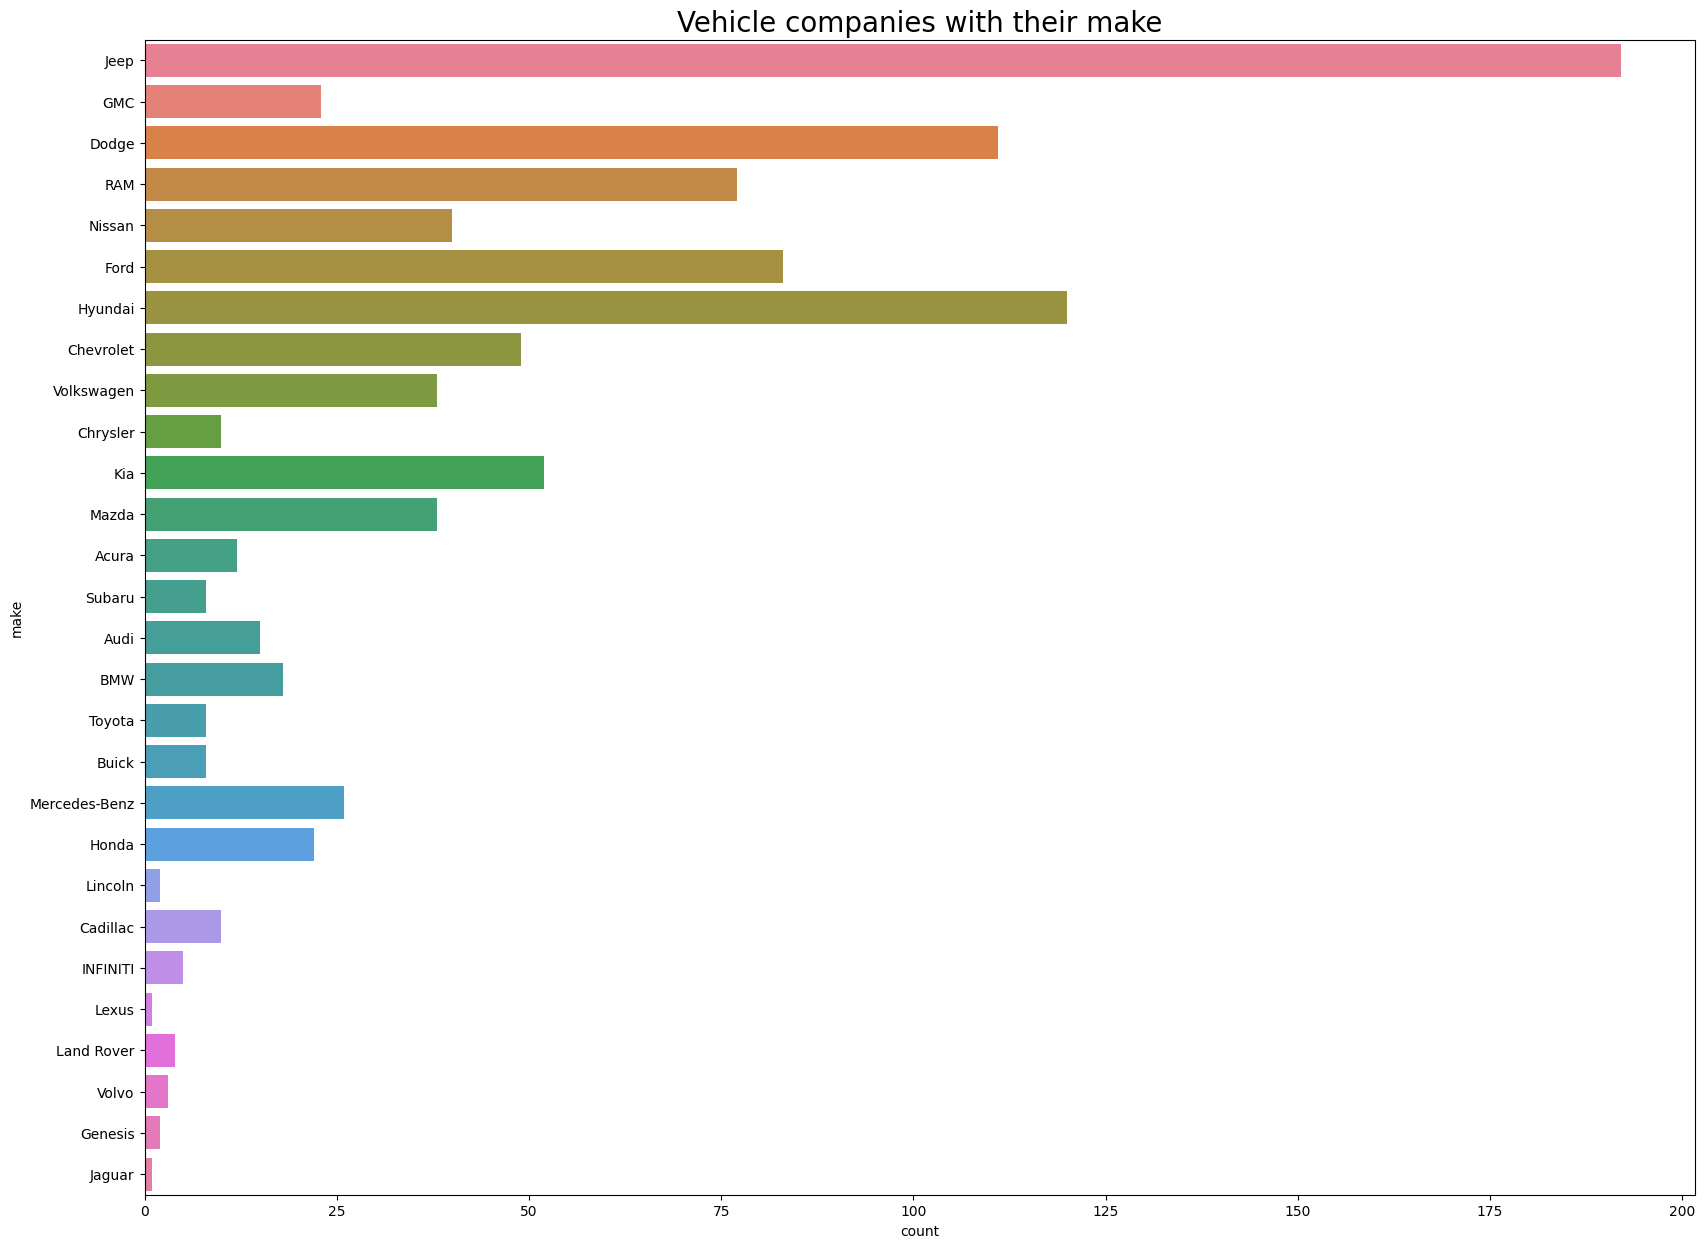

In [ ]:
plt.figure(figsize = (20, 15))
sns.countplot(y = df.make,palette='husl')
plt.title("Vehicle companies with their make", fontsize = 20)
plt.show()

**Countplot of Engine Fuel Type**

/tmp/ipython-input-144-94636491.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df['fuel'].sort_values(ascending = False), palette = 'husl')


<Axes: xlabel='count', ylabel='fuel'>

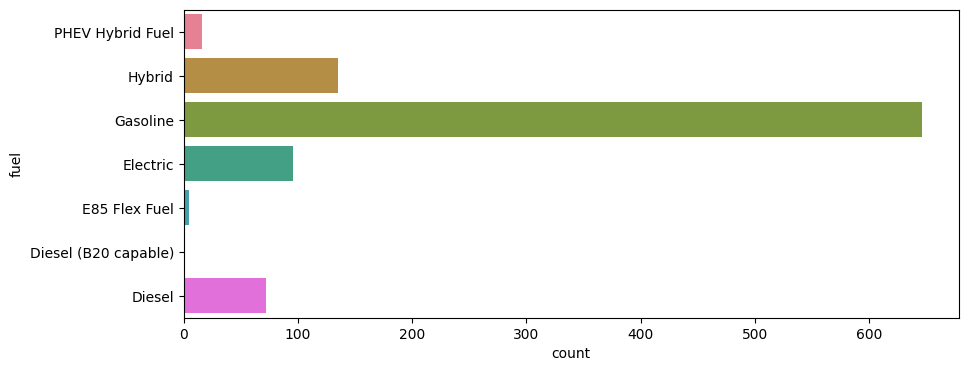

In [ ]:
plt.figure(figsize = (10, 4))
sns.countplot(y = df['fuel'].sort_values(ascending = False), palette = 'husl')

**Countplot of different Vehicle companies with their models**

/tmp/ipython-input-149-3785711183.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df.model,palette='Set3')


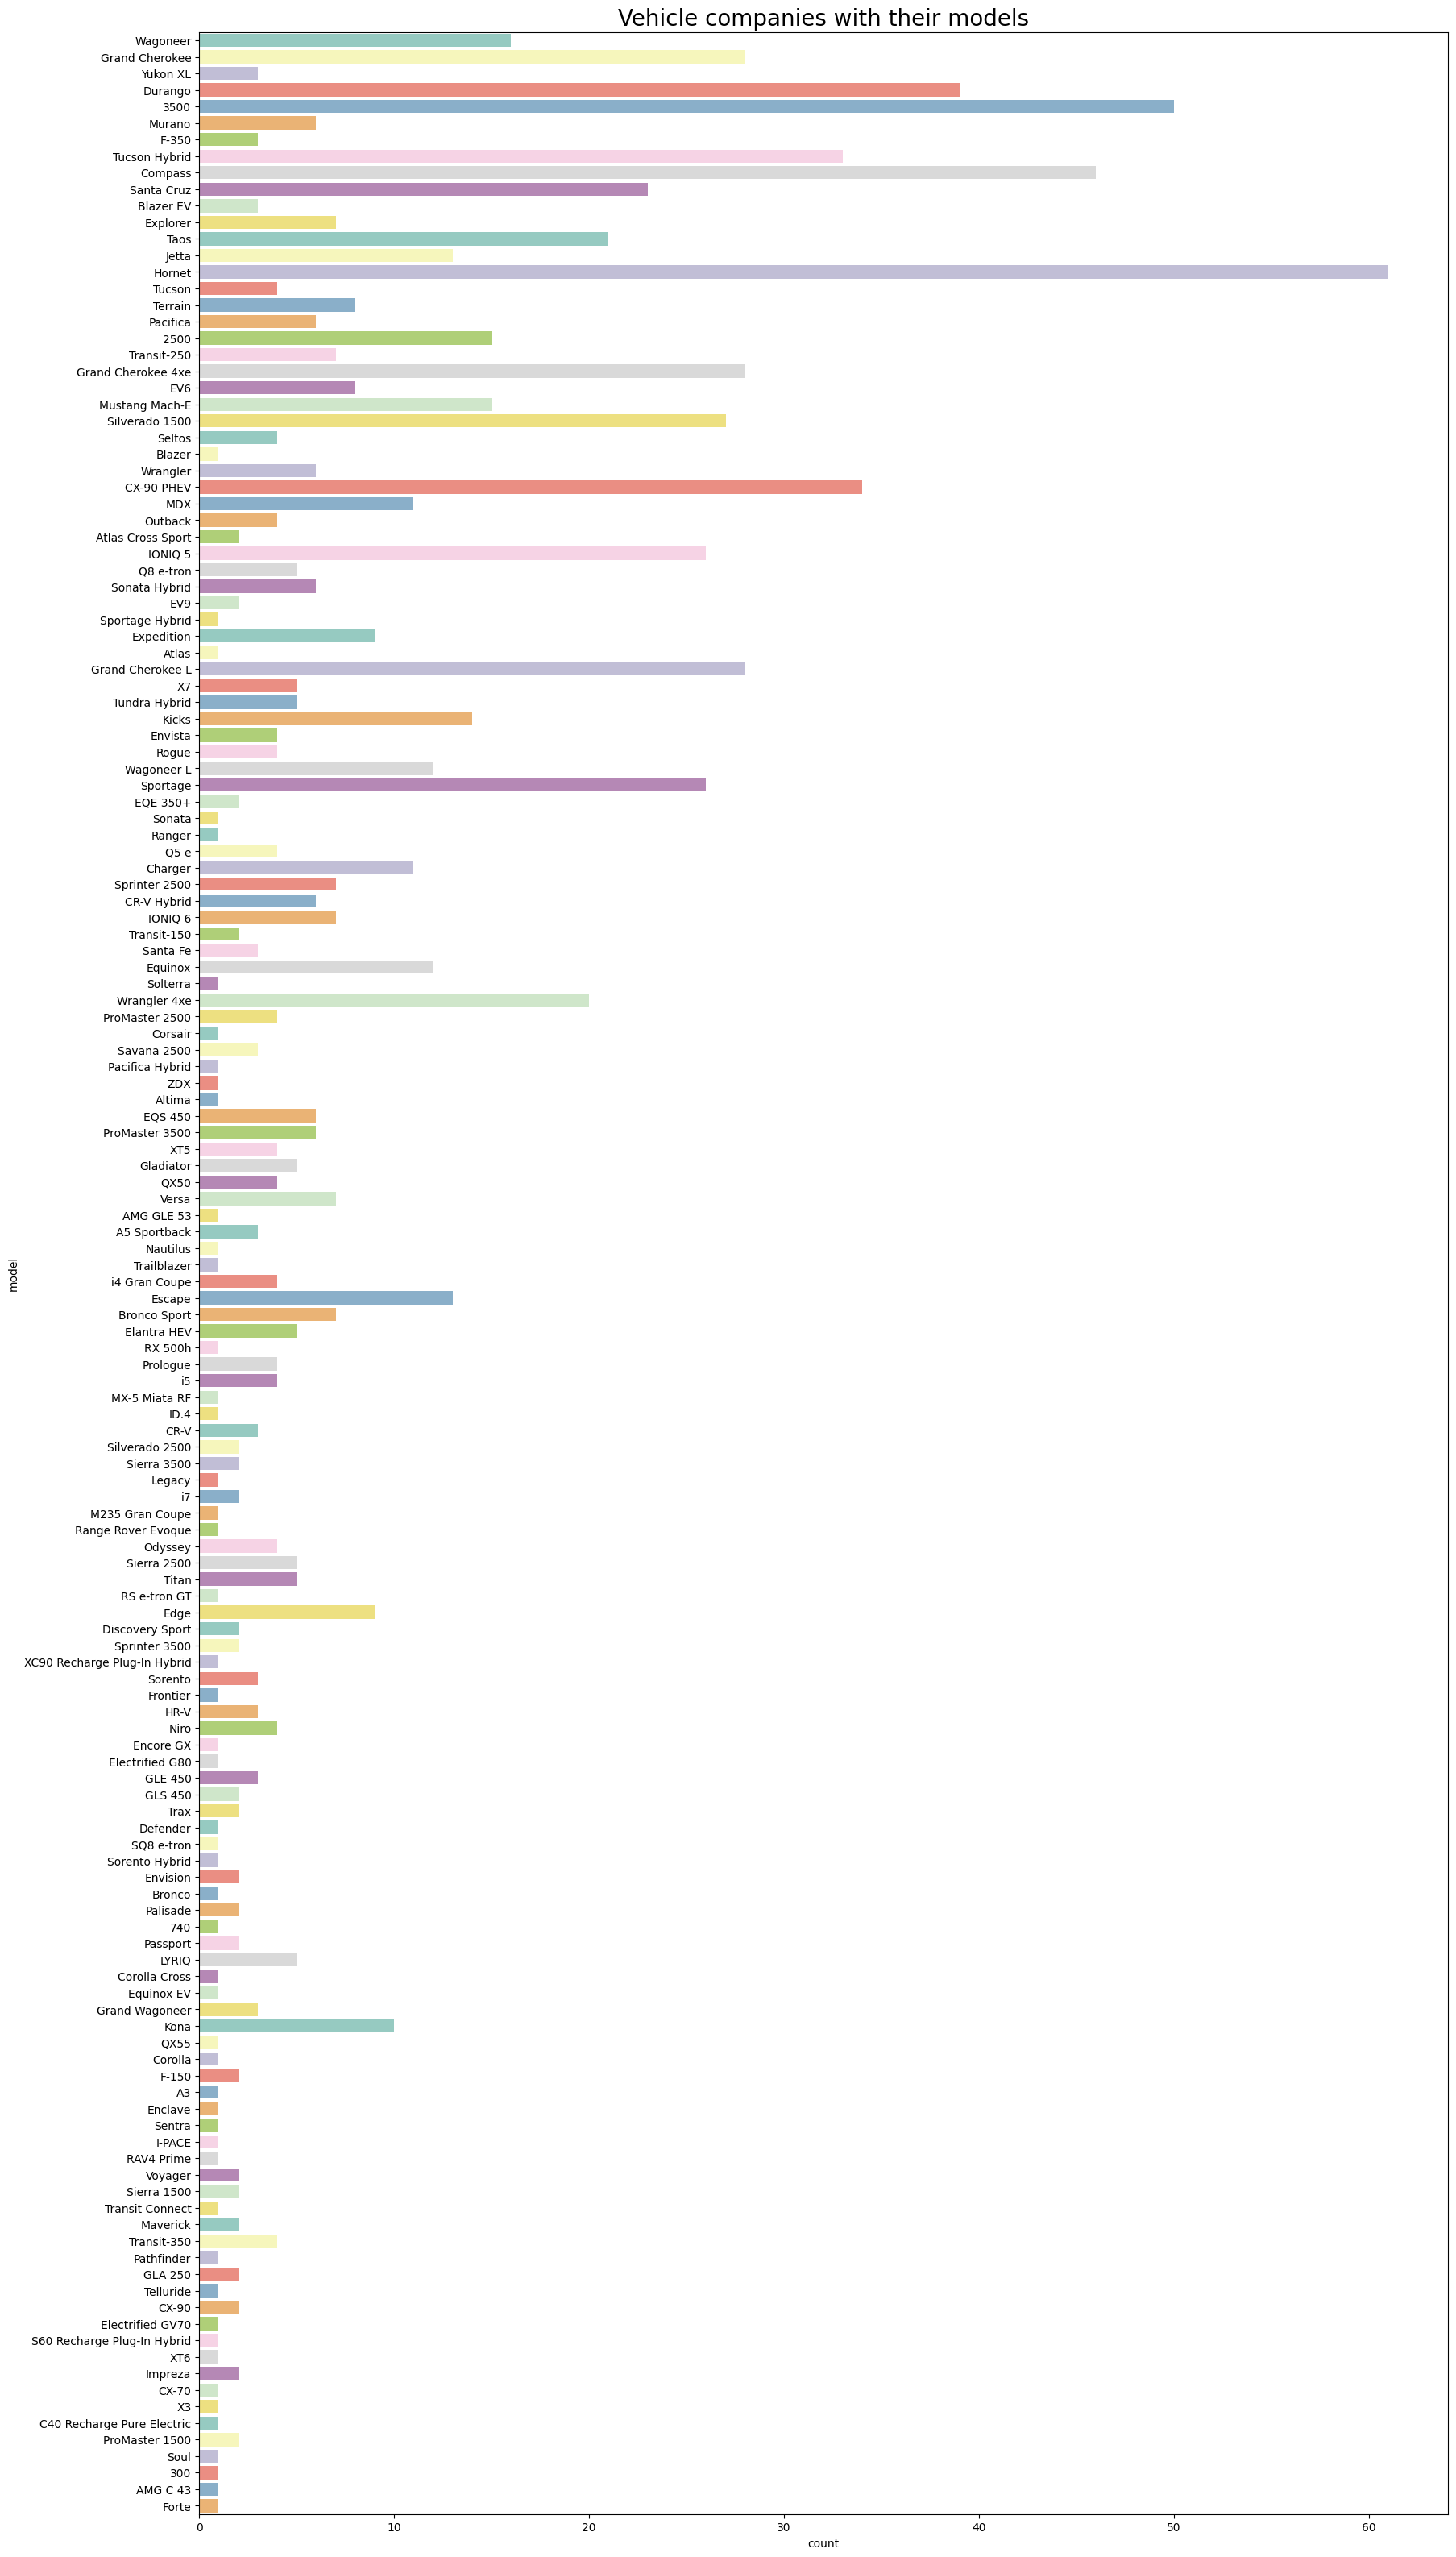

In [ ]:
plt.figure(figsize = (20, 40))
sns.countplot(y = df.model,palette='Set3')
plt.title("Vehicle companies with their models", fontsize = 20)
plt.show()

**Countplot of different Vehicles with their body type**

/tmp/ipython-input-153-616109134.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df.body,palette='tab10')


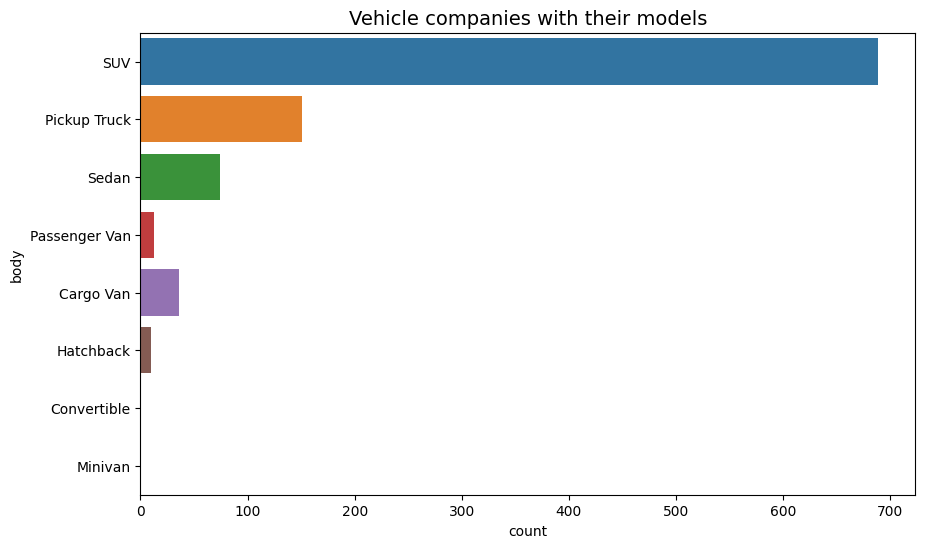

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(y = df.body,palette='tab10')
plt.title("Vehicle companies with their body types", fontsize = 14)
plt.show()

**Countplot of Vehicles with different drive modes**

/tmp/ipython-input-159-3871414519.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'drivetrain', data = df, palette = 'husl')


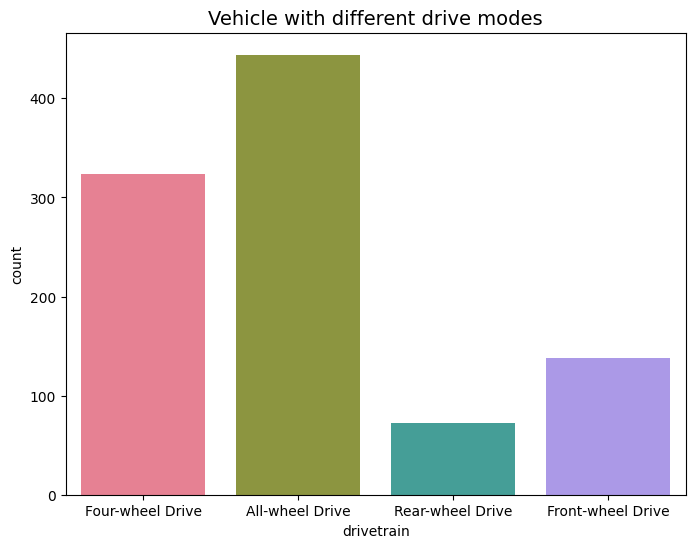

In [ ]:
plt.figure(figsize = (8, 6))
sns.countplot(x = 'drivetrain', data = df, palette = 'husl')
plt.title("Vehicle with different drive modes", fontsize = 14)
plt.show()

Countplot of Vehicles with different interior colours

/tmp/ipython-input-171-2098126272.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df.interior_color,palette='tab20')


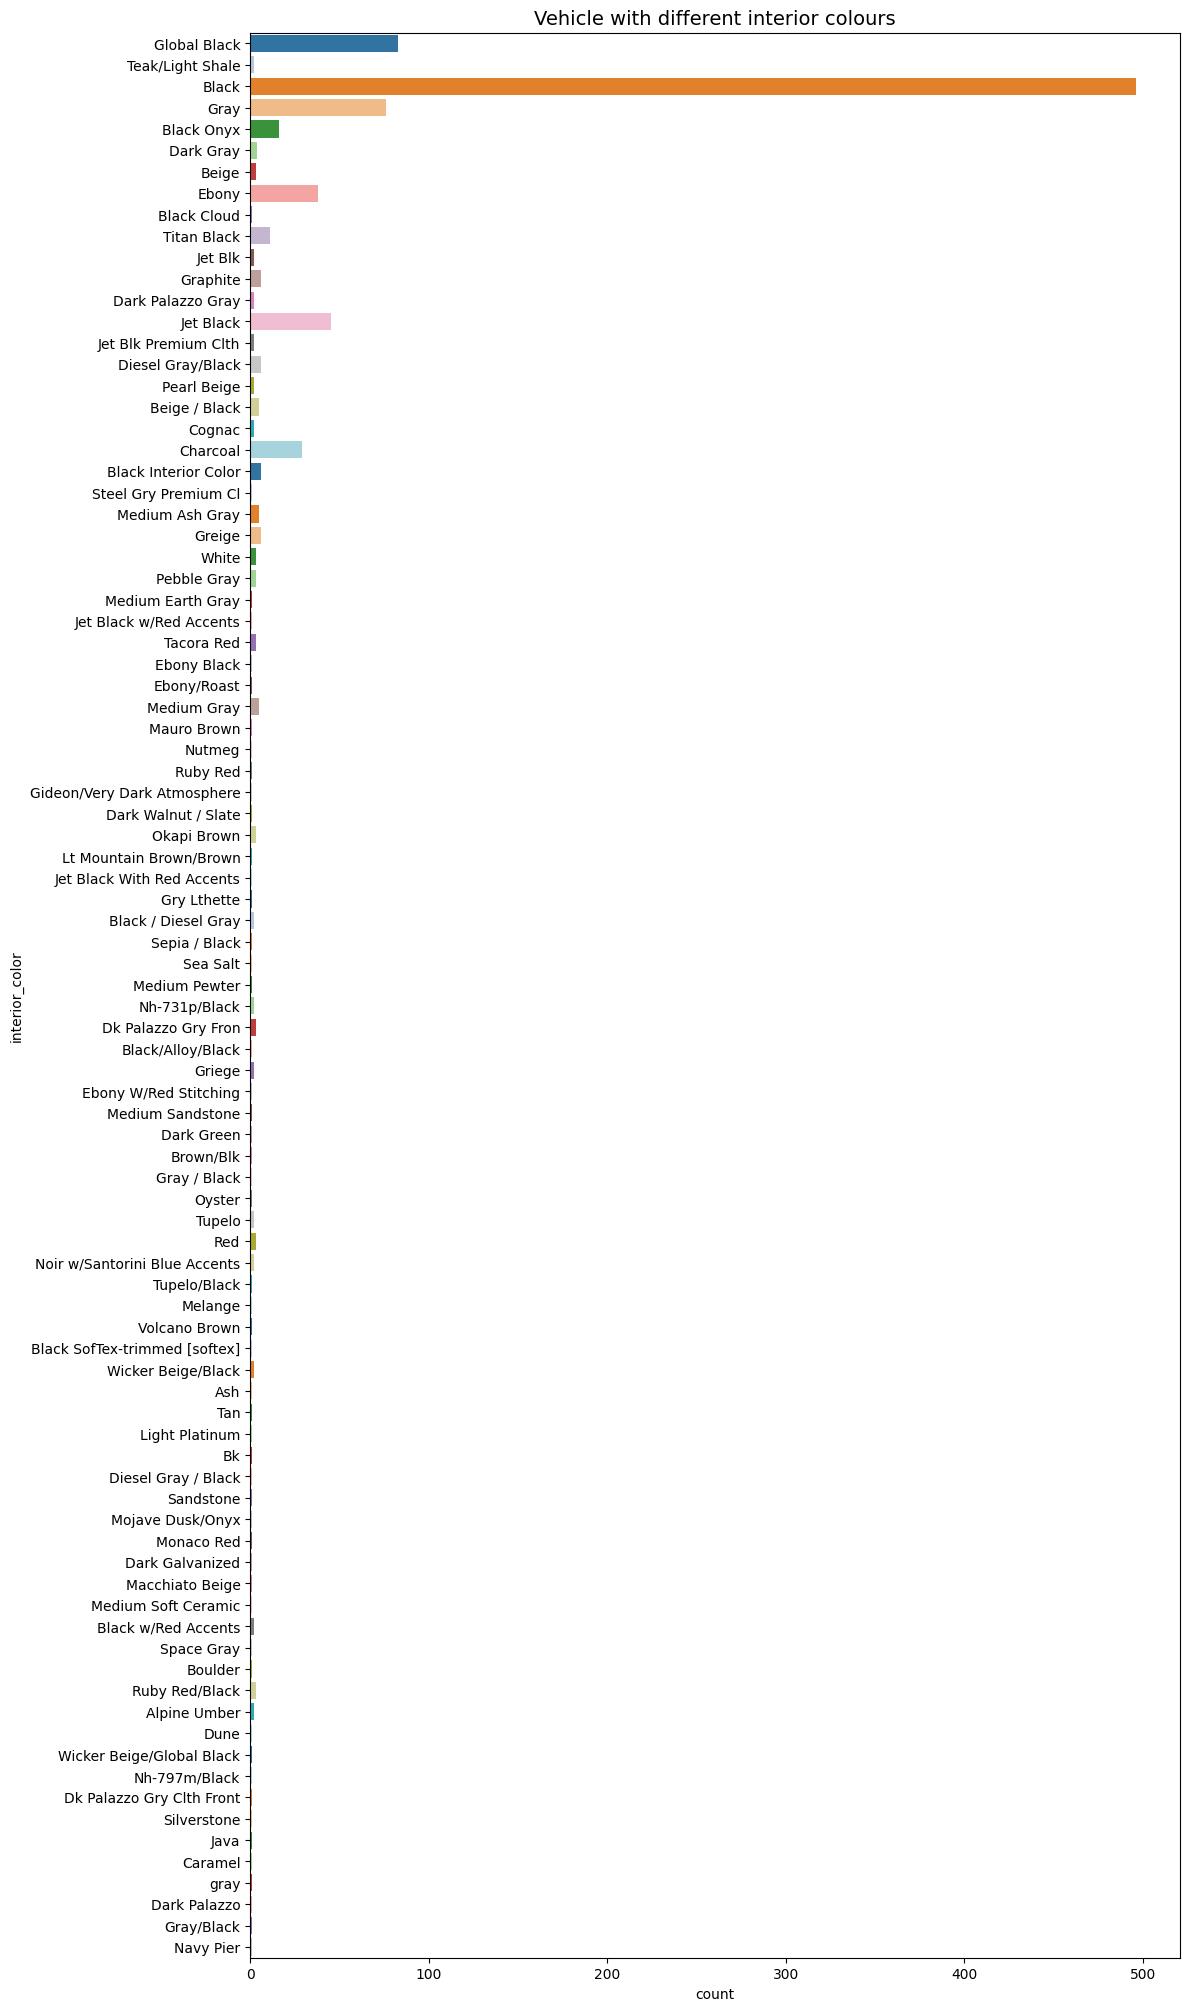

In [ ]:
plt.figure(figsize = (12,25))
sns.countplot(y = df.interior_color,palette='tab20')
plt.title("Vehicle with different interior colours", fontsize = 14)
plt.show()

In [ ]:
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['year', 'price', 'cylinders', 'mileage', 'doors']
Categorical Columns: ['make', 'model', 'engine', 'fuel', 'transmission', 'trim', 'body', 'exterior_color', 'interior_color', 'drivetrain']


<Axes: >

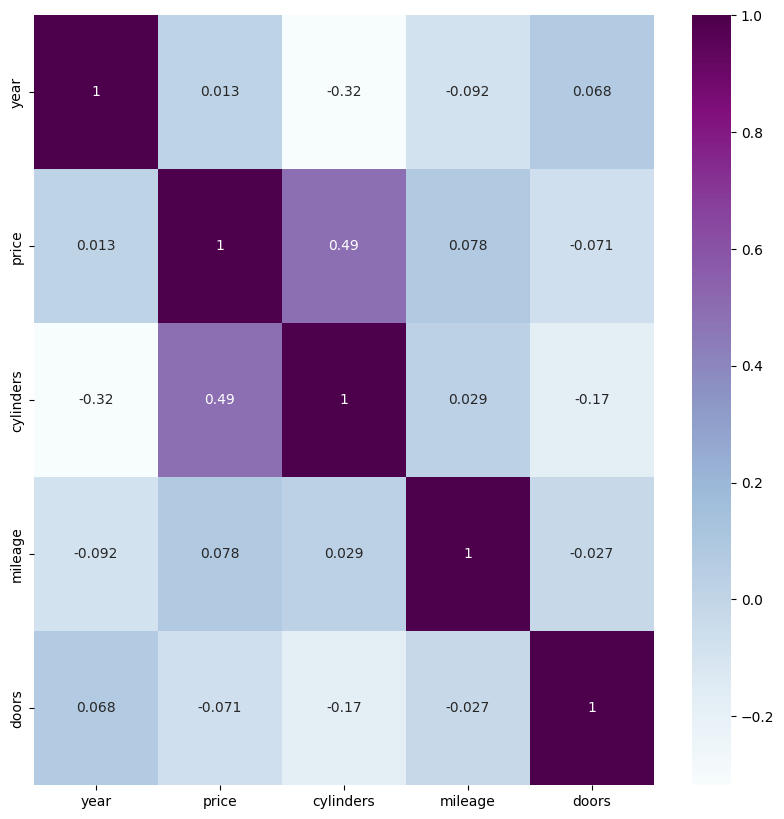

In [ ]:
plt.figure(figsize = (10, 10))
heatmap_data = df[numerical_cols].corr()
sns.heatmap(heatmap_data, cmap = 'BuPu', annot = True)

In [ ]:
# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Split before transformation to prevent leakage
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define feature types
numeric_features = ['year', 'cylinders', 'mileage', 'doors']
low_card_cat_features = ['make', 'fuel', 'transmission', 'body', 'drivetrain']
high_card_cat_features = ['model', 'trim', 'engine', 'exterior_color', 'interior_color']

In [ ]:
# Define transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [ ]:
low_card_cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
high_card_cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [ ]:
# Combine transformers into one ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('low_cat', low_card_cat_transformer, low_card_cat_features),
    ('high_cat', high_card_cat_transformer, high_card_cat_features)
])

In [ ]:
# Fit-transform only training data, transform test data
X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

In [ ]:
import joblib

# Save preprocessor to current folder
joblib.dump(preprocessor, 'preprocessor.pkl')

# To load later
# preprocessor = joblib.load('preprocessor.pkl')
# X_new = preprocessor.transform(new_raw_input_df)

['preprocessor.pkl']

In [ ]:
# Output shapes
print("Shapes after preprocessing:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Shapes after preprocessing:
X_train: (782, 89)
X_test: (196, 89)
y_train: (782,)
y_test: (196,)


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor


In [ ]:
# Define all models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "XGBoost Regressor": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
  }


In [ ]:
# Evaluate all models
results = []

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    results.append((name, r2, mae, rmse))
    print(f"\n{name}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")


Linear Regression
R² Score: 0.5567
MAE: 8273.08
RMSE: 12656.27

Ridge Regression
R² Score: 0.6144
MAE: 7736.83
RMSE: 11804.13

Random Forest
R² Score: 0.8061
MAE: 4477.39
RMSE: 8371.12

Gradient Boosting
R² Score: 0.6845
MAE: 6283.94
RMSE: 10677.52

KNN Regressor
R² Score: 0.2180
MAE: 11923.00
RMSE: 16809.96

XGBoost Regressor
R² Score: 0.7636
MAE: 5145.14
RMSE: 9242.93


In [ ]:
results_df = pd.DataFrame(results, columns=["Model", "R² Score", "MAE", "RMSE"])
print(results_df.sort_values(by="R² Score", ascending=False))

               Model  R² Score           MAE          RMSE
2      Random Forest  0.806060   4477.386136   8371.118255
5  XGBoost Regressor  0.763561   5145.143027   9242.925690
3  Gradient Boosting  0.684469   6283.941492  10677.521206
1   Ridge Regression  0.614372   7736.825060  11804.134724
0  Linear Regression  0.556685   8273.079226  12656.271516
4      KNN Regressor  0.217951  11923.000000  16809.956347


In [ ]:
# Sort by R² Score in descending order
best_models_df = results_df.sort_values(by="R² Score", ascending=False).reset_index(drop=True)
best_models_df.index += 1


In [ ]:
# Display the ranked table
print(best_models_df)

               Model  R² Score           MAE          RMSE
1      Random Forest  0.806060   4477.386136   8371.118255
2  XGBoost Regressor  0.763561   5145.143027   9242.925690
3  Gradient Boosting  0.684469   6283.941492  10677.521206
4   Ridge Regression  0.614372   7736.825060  11804.134724
5  Linear Regression  0.556685   8273.079226  12656.271516
6      KNN Regressor  0.217951  11923.000000  16809.956347


In [ ]:


from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(model, model_name, X_train, y_train, X_test, y_test,
                   error_mean_squared, error_mean_absolute, error_rmse, results_summary):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Append all errors to their respective lists
    error_mean_squared.append(int(mse))
    error_mean_absolute.append(int(mae))
    error_rmse.append(int(rmse))

    # Build prediction vs actual DataFrame
    y_pred_df = pd.DataFrame(y_pred, columns=['Predicted Output'])
    y_test_df = y_test.reset_index(drop=True).to_frame()
    results = pd.concat([y_pred_df, y_test_df], axis=1)
    results.columns = ['Predicted Output', 'MSRP']
    results_summary[model_name] = results

    # Show a sample and plot
    print(f"\n {model_name} Results:")
    print(results.head())

    plt.figure(figsize=(8, 8))
    sns.regplot(data=results, x='MSRP', y='Predicted Output', color='firebrick', marker='o')
    plt.title(f"{model_name}: Predicted vs Actual Prices", fontsize=16)
    plt.xlabel("Actual MSRP")
    plt.ylabel("Predicted MSRP")
    plt.tight_layout()
    plt.show()



 Linear Regression Results:
   Predicted Output     MSRP
0      72782.569028  83940.0
1      46784.594754  51803.0
2      17822.535526  56105.0
3      39140.235252  37335.0
4      41556.514172  28860.0


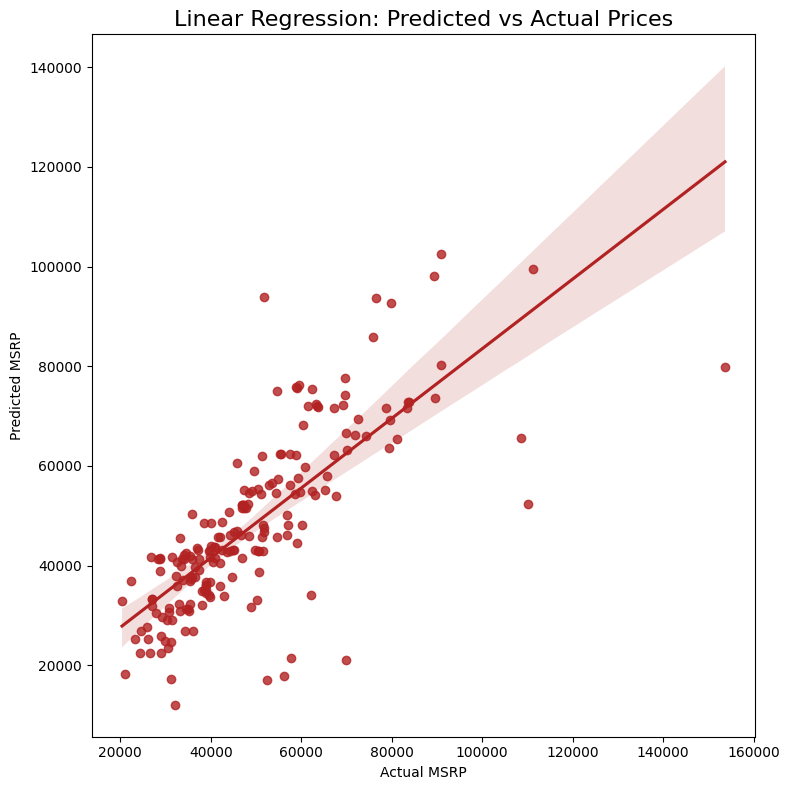


 Ridge Regression Results:
   Predicted Output     MSRP
0      72617.244218  83940.0
1      47754.514212  51803.0
2      30535.335249  56105.0
3      39549.919083  37335.0
4      41794.445793  28860.0


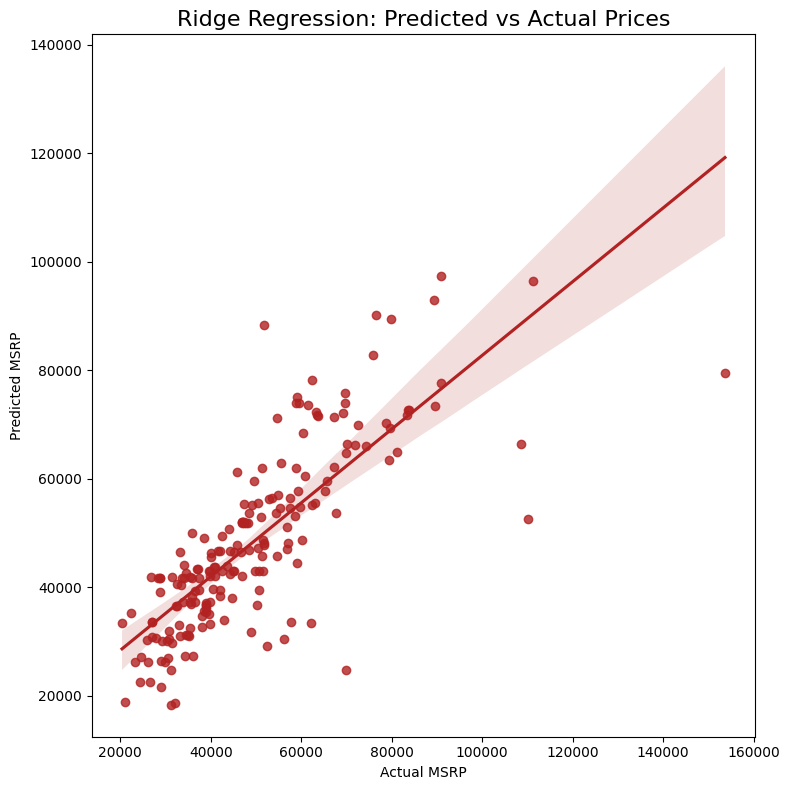


 Random Forest Results:
   Predicted Output     MSRP
0      83830.950000  83940.0
1      52320.540000  51803.0
2      42027.870000  56105.0
3      39989.530000  37335.0
4      30866.636667  28860.0


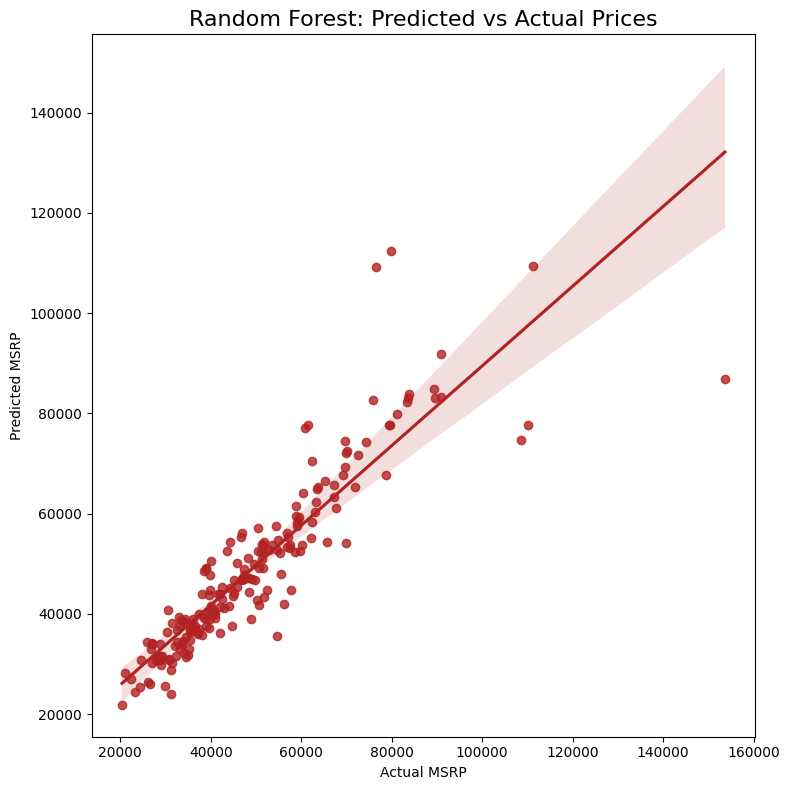


 Gradient Boosting Results:
   Predicted Output     MSRP
0      77448.077591  83940.0
1      53275.240205  51803.0
2      48271.531303  56105.0
3      38578.911668  37335.0
4      36080.802030  28860.0


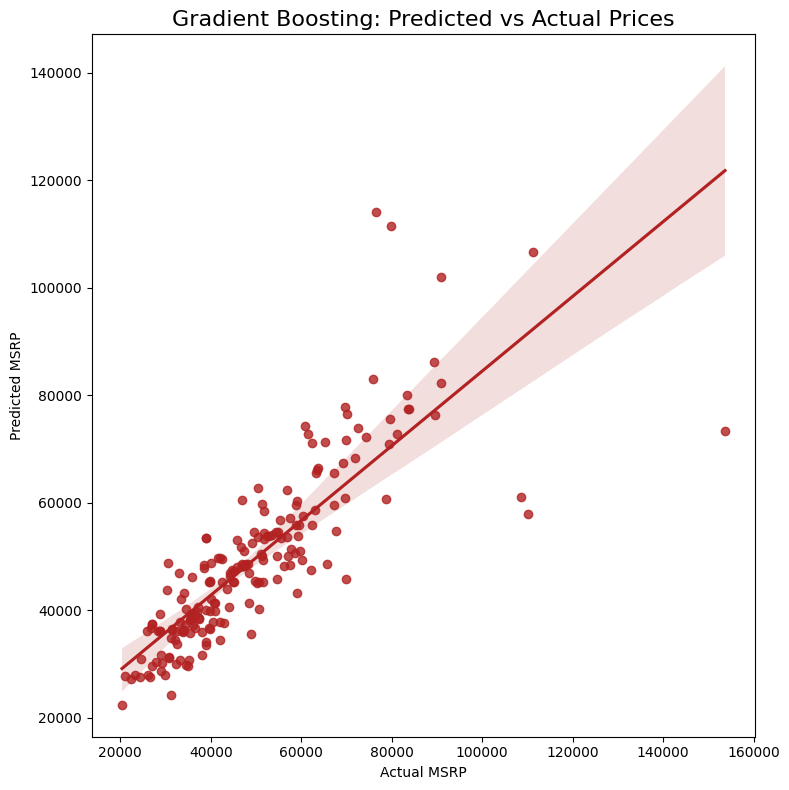


 KNN Regressor Results:
   Predicted Output     MSRP
0           83048.8  83940.0
1           56513.8  51803.0
2           71430.4  56105.0
3           50694.0  37335.0
4           32678.6  28860.0


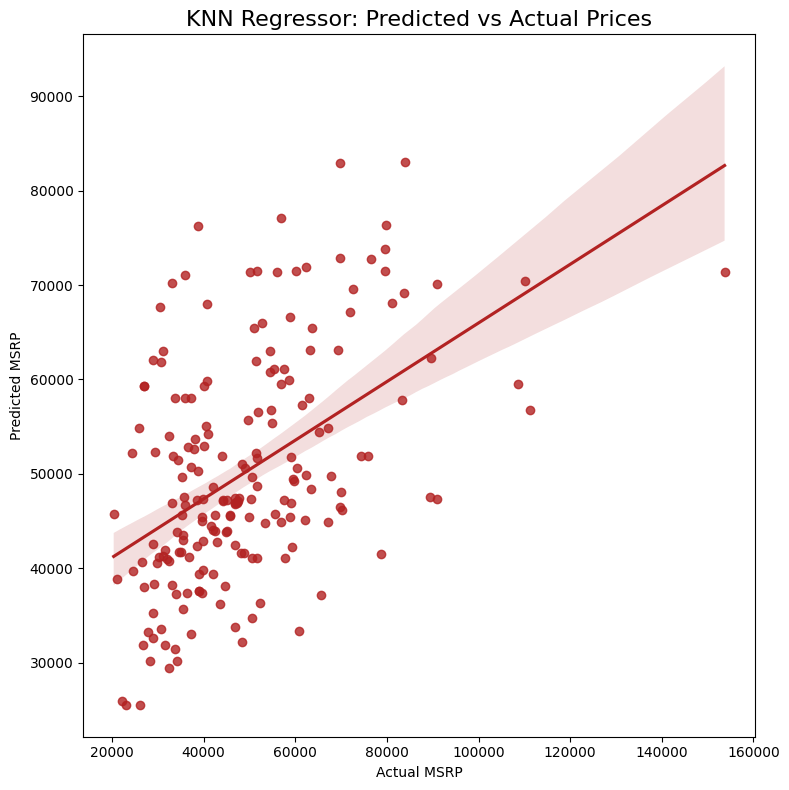


 XGBoost Regressor Results:
   Predicted Output     MSRP
0      83714.054688  83940.0
1      55088.511719  51803.0
2      40711.792969  56105.0
3      36081.632812  37335.0
4      32568.904297  28860.0


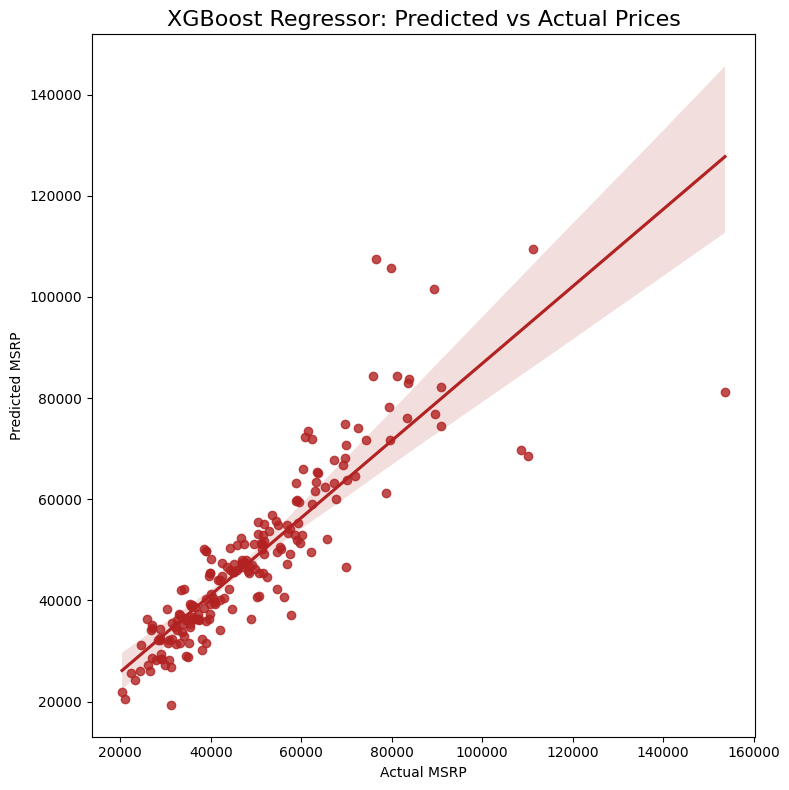

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(



 MLP Regressor Results:
   Predicted Output     MSRP
0      72717.398253  83940.0
1      52552.865642  51803.0
2      26818.374523  56105.0
3      51513.027564  37335.0
4      35563.301913  28860.0


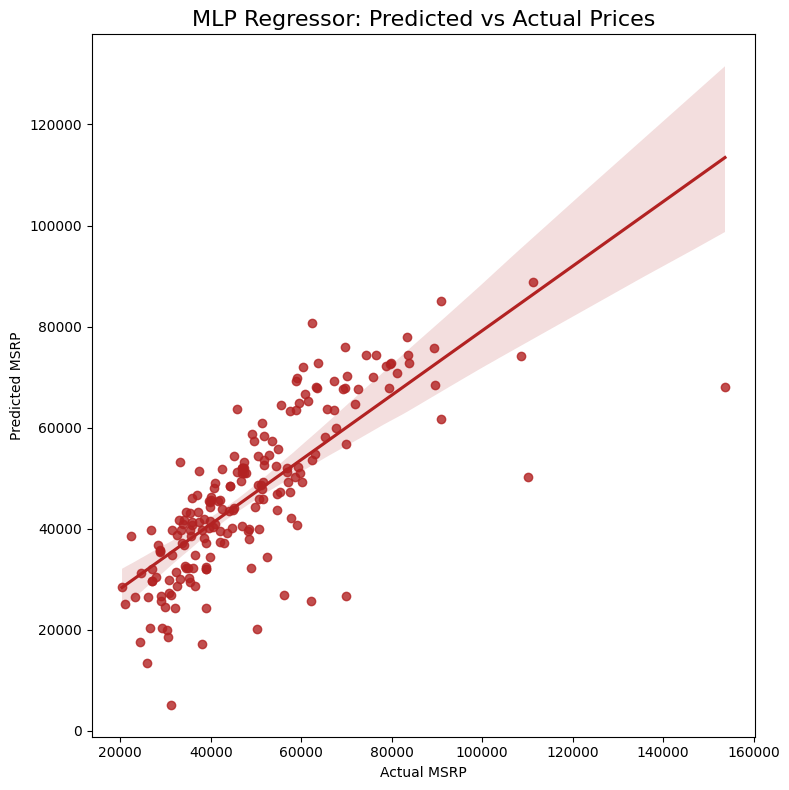

Saved best model: Random Forest with RMSE: 8371


In [ ]:
import joblib

error_mean_squared = []
error_mean_absolute = []
error_rmse = []
results_summary = {}

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "XGBoost Regressor": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
}

best_model = None
best_model_name = ""
lowest_rmse = float('inf')

for model_name, model in models.items():
    evaluate_model(model, model_name, X_train, y_train, X_test, y_test,
                   error_mean_squared, error_mean_absolute, error_rmse, results_summary)

    current_rmse = error_rmse[-1]  # the last appended RMSE
    if current_rmse < lowest_rmse:
        lowest_rmse = current_rmse
        best_model = model
        best_model_name = model_name

# Save the best model to disk
joblib.dump(best_model, f"{best_model_name}_best_model.pkl")
print(f"Saved best model: {best_model_name} with RMSE: {lowest_rmse}")



In [ ]:
model_names = [
    'Linear Regression',
    'Ridge Regression',
    'Random Forest',
    'Gradient Boosting',
    'KNN Regressor',
    'XGBoost Regressor',
    'MLP Regressor'
]

data = {
    'Models': model_names,
    'Mean Absolute Error': error_mean_absolute,
    'Mean Squared Error': error_mean_squared,
    'RMSE': error_rmse
}

model_dataframe = pd.DataFrame(data)
print(model_dataframe)


              Models  Mean Absolute Error  Mean Squared Error   RMSE
0  Linear Regression                 8273           160181208  12656
1   Ridge Regression                 7736           139337596  11804
2      Random Forest                 4477            70075620   8371
3  Gradient Boosting                 6283           114009459  10677
4      KNN Regressor                11923           282574632  16809
5  XGBoost Regressor                 5145            85431675   9242
6      MLP Regressor                 8040           153022589  12370


/tmp/ipython-input-190-277271763.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_dataframe, x='Models', y='Mean Absolute Error', palette='husl')


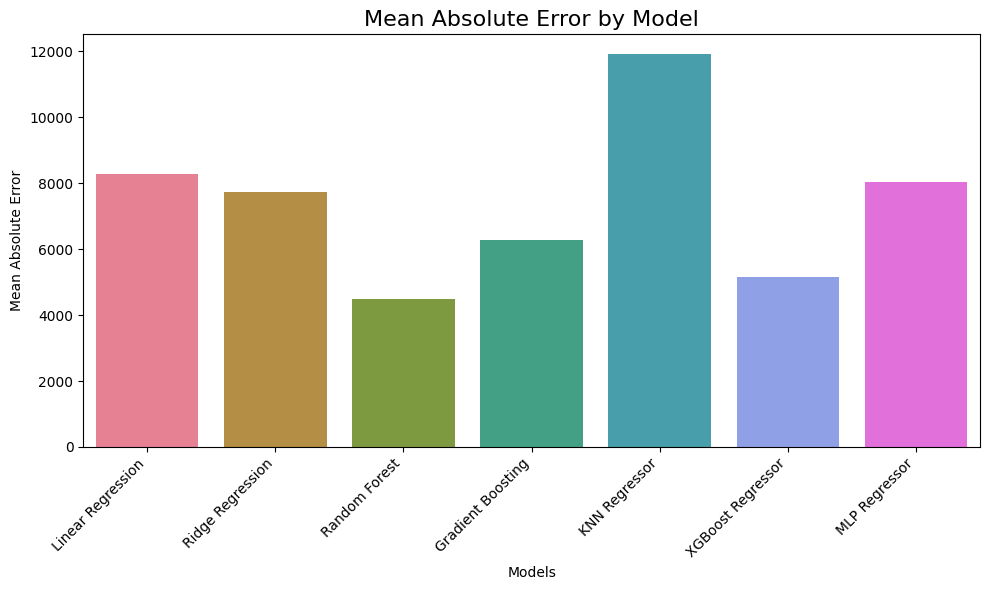

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=model_dataframe, x='Models', y='Mean Absolute Error', palette='husl')
plt.xticks(rotation=45, ha='right')
plt.title("Mean Absolute Error by Model", fontsize=16)
plt.tight_layout()
plt.show()


/tmp/ipython-input-194-3794493363.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_dataframe, x='Models', y='Mean Squared Error', palette='Spectral')


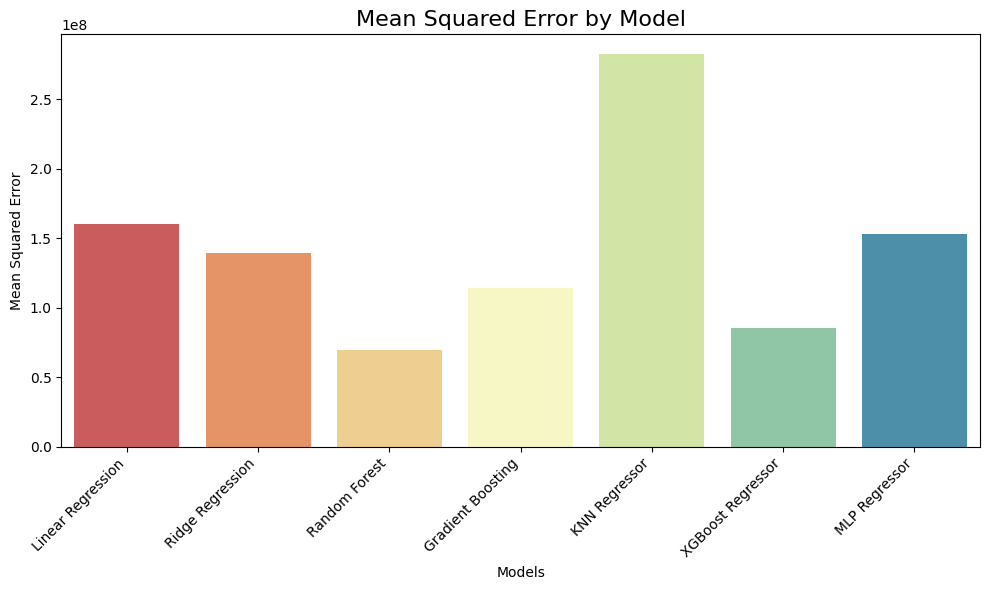

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=model_dataframe, x='Models', y='Mean Squared Error', palette='Spectral')
plt.xticks(rotation=45, ha='right')
plt.title("Mean Squared Error by Model", fontsize=16)
plt.tight_layout()
plt.show()

/tmp/ipython-input-205-2551693890.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_dataframe, x='Models', y='RMSE', palette='flare')


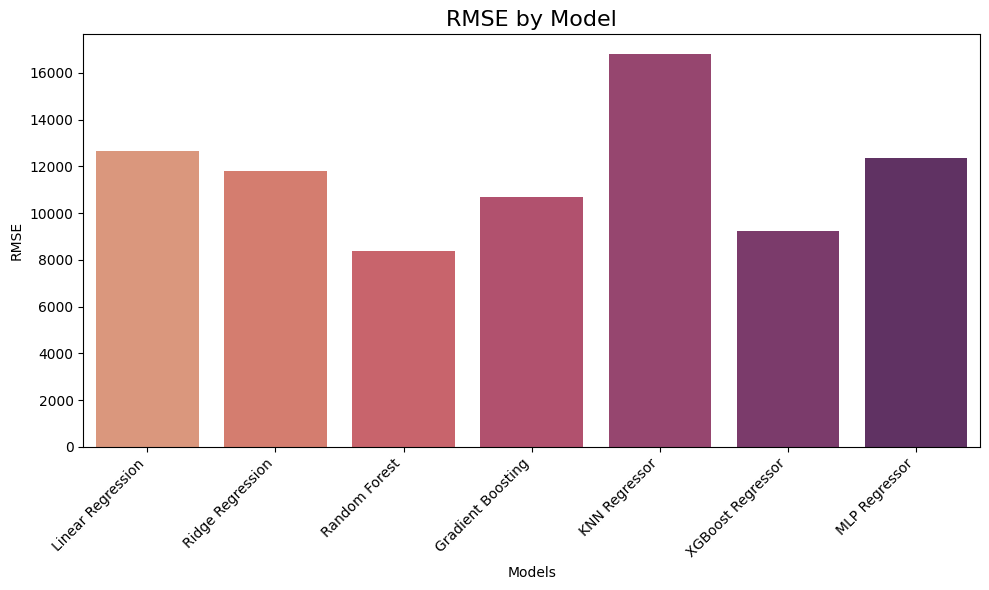

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=model_dataframe, x='Models', y='RMSE', palette='flare')
plt.xticks(rotation=45, ha='right')
plt.title("RMSE by Model", fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

model_names = [
    'Linear Regression',
    'Ridge Regression',
    'Random Forest',
    'Gradient Boosting',
    'KNN Regressor',
    'XGBoost Regressor',
    'MLP Regressor'
]

# Combine all errors into a DataFrame
model_dataframe = pd.DataFrame({
    'Models': model_names,
    'Mean Absolute Error': error_mean_absolute,
    'Mean Squared Error': error_mean_squared,
    'Root Mean Squared Error': error_rmse
})


In [ ]:
def highlight_best_model(row):
    # Highlight the row with the minimum RMSE
    is_best = row['Root Mean Squared Error'] == model_dataframe['Root Mean Squared Error'].min()
    return ['background-color: lightgreen' if is_best else '' for _ in row]

styled_df = model_dataframe.style.apply(highlight_best_model, axis=1)
styled_df


,Models,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,8273,160181208,12656
1,Ridge Regression,7736,139337596,11804
2,Random Forest,4477,70075620,8371
3,Gradient Boosting,6283,114009459,10677
4,KNN Regressor,11923,282574632,16809
5,XGBoost Regressor,5145,85431675,9242
6,MLP Regressor,8040,153022589,12370


In [ ]:
loaded_model = joblib.load("Random Forest_best_model.pkl")

In [ ]:
# Instead of saving model and preprocessor separately, combine them into a Pipeline and save/load that:

In [ ]:
from sklearn.pipeline import Pipeline

# Combine preprocessor + model
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

# Save it
import joblib
joblib.dump(full_pipeline, "vehicle_price_pipeline.pkl")

#import cloudpickle

#with open("vehicle_price_pipeline.pkl", "wb") as f:
   # cloudpickle.dump(full_pipeline, f)


['vehicle_price_pipeline.pkl']